In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
# Prepare the data for training
X = np.loadtxt('train_2008.csv', skiprows = 1, delimiter = ',')
data = X[:, 3:-1]
labels = X[:, -1]

In [3]:
#For normalizing Data
def normalize(x_in, x_out):
    '''
    Given training datapoints x_in texting points x_out, 
    it returns normalized x_in and x_out
    Inputs:
        x_in: A (N, D) shaped training data.
        x_out: A (N, D) shaped testing data.

    Outputs:
        x_in, x_out: normalized data based on x_in
    '''
    x_in_norm = np.copy(x_in)
    x_out_norm = np.copy(x_out)
    n, d = x_in.shape
    std_dev = [0]*d 
    mean = [0]*d
    for j in range(d):
        mean[j] = np.mean(x_in[:, j])
        std_dev[j]= np.std(x_in[:, j])
    for i, x_i in enumerate(x_in):
        for  j, x in enumerate(x_i):
            if std_dev[j] != 0:
                x_in_norm[i,j] = (x - mean[j])/std_dev[j]
    for i, x_i in enumerate(x_out):
        for  j, x in enumerate(x_i):
            if std_dev[j] != 0:
                x_out_norm[i,j] = (x - mean[j])/std_dev[j]
    return x_in_norm, x_out_norm

In [4]:
# Prepare the train and test data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2)
X_train, X_test = normalize(X_train, X_test)

In [5]:
def eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    maximum tree depth parameters in the vector max_depth, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        max_depth: a (T, ) vector of all the max_depth stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    test_err = []
    train_err = []
    for depth in max_depth:
        clf.set_params(max_depth = depth)
        clf.fit(X_train, y_train)
        test_err.append(clf.score(X_test, y_test))
        train_err.append(clf.score(X_train, y_train))
    return np.array(train_err), np.array(test_err)

/Users/brandonquach/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


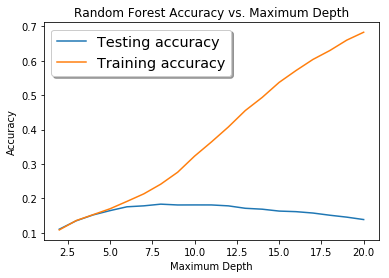

Test Accuracy maximized at max_depth = 8


In [6]:
clf = RandomForestRegressor()

max_depth = np.arange(2, 21)

train_acc, test_acc = eval_tree_based_model_max_depth(clf, max_depth, X_train, y_train, X_test, y_test)

plt.figure()
plt.plot(max_depth, test_acc, label='Testing accuracy')
plt.plot(max_depth, train_acc, label='Training accuracy')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs. Maximum Depth')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test Accuracy maximized at max_depth = %i' % max_depth[np.argmax(test_acc)])

/Users/brandonquach/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


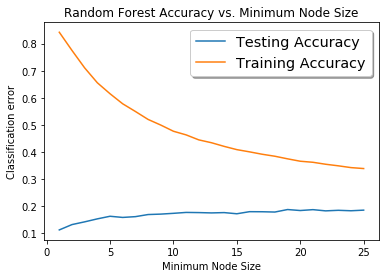

Test accuracy maximized at min_samples_leaf = 19


In [8]:
def eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    train_err = []
    test_err = []
    for minimum in min_samples_leaf:
        clf.set_params(min_samples_leaf = minimum)
        clf.fit(X_train, y_train)
        train_err.append(clf.score(X_train, y_train))
        test_err.append(clf.score(X_test, y_test))
    return np.array(train_err), np.array(test_err)

clf = RandomForestRegressor()

min_samples_leaf = np.arange(1, 26)

train_err, test_err = eval_tree_based_model_min_samples(clf, min_samples_leaf, X_train, y_train, X_test, y_test)

plt.figure()
plt.plot(min_samples_leaf, test_err, label='Testing Accuracy')
plt.plot(min_samples_leaf, train_err, label='Training Accuracy')
plt.xlabel('Minimum Node Size')
plt.ylabel('Classification error')
plt.title('Random Forest Accuracy vs. Minimum Node Size')
plt.legend(loc=0, shadow=True, fontsize='x-large')
plt.show()

print('Test accuracy maximized at min_samples_leaf = %i' % min_samples_leaf[np.argmax(test_err)])

In [12]:
def eval_tree_based_max_features(clf, max_feat, X_train, y_train, X_test, y_test):
    """
    This function evaluates the given classifier (either a decision tree or random forest) at all of the 
    minimum leaf size parameters in the vector min_samples_leaf, using the given training and testing
    data. It returns two vector, with the training and testing classification errors.
    
    Inputs:
        clf: either a decision tree or random forest classifier object
        min_samples_leaf: a (T, ) vector of all the min_samples_leaf stopping condition parameters 
                            to test, where T is the number of parameters to test
        X_train: (N, D) matrix of training samples.
        y_train: (N, ) vector of training labels.
        X_test: (N, D) matrix of test samples
        y_test: (N, ) vector of test labels
    Output:
        train_err: (T, ) vector of classification errors on the training data
        test_err: (T, ) vector of classification errors on the test data
    """
    print('max_features, train, test')
    for num_feat in max_feat:
        clf.set_params(max_features = num_feat)
        clf.fit(X_train, y_train)
        print(num_feat, clf.score(X_train, y_train), clf.score(X_test, y_test))
    return np.array(train_err), np.array(test_err)

clf = RandomForestRegressor()

max_feat = ['auto', 'sqrt', 'log2']

train_err, test_err = eval_tree_based_max_features(clf, max_feat, X_train, y_train, X_test, y_test)

max_features, train, test


/Users/brandonquach/anaconda/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auto 0.8428391980725128 0.10738954412427704
sqrt 0.8396918274236408 0.10792076427572615
log2 0.8380340365731728 0.10367512104980303


In [13]:
clf = RandomForestRegressor(n_estimators = 100, max_depth = 9)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.19269961766986832
